In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/Capstone/Final_Analysis/posts_with_keywords.csv")

In [ ]:
df.isna().sum()

full_link             0
subreddit             4
post keywords    143891
id                    6
date                  6
score                 6
num_comments          6
author                6
title                 6
selftext          10392
top_comment       10924
comment_score     10926
keywords              0
dtype: int64

In [ ]:
df = df.drop(['post keywords'], axis = 1)

In [ ]:
df.head(1)

,full_link,subreddit,id,date,score,num_comments,author,title,selftext,top_comment,comment_score,keywords
0,https://www.reddit.com/r/whatcarshouldIbuy/com...,whatcarshouldIbuy,5fsq70,2016-11-30,3.0,5.0,ChalkPie,≤$9k and <50k miles?,I've been driving the same car since I started...,I've seen a few Ford Focus/Hyundai Accent seda...,1.0,"{'aesthetically', '≤9k', 'keep', 'something', ..."


In [ ]:
# changing keyword "dict" to list
df['keywords'] = df['keywords'].apply(lambda x: list(eval(x)))

In [ ]:
## Word Cloud

In [ ]:
def draw_wordcloud(dataframe):

  comment_words = ''
  stopwords = set([' \\n', '\\n', ' ', 'good', 'really', 'look', 'get', 'work', 'seem','like', 'car', 'guy',
                'great', 'need', 'first', 'also', 'much', 'buy', 'drive', 'get', 'new', 'price', 'feature',
                'would', 'love', 'something', 'make', 'mile', 'long', 'year', 'want', 'market',
                'use', 'fun', 'take', 'cost', 'thank', 'deal', 'know', 'go', 'budget', 'well', 'live', 'model',
                'descent', 'advice', 'problem', 'break', 'time', 'fit', 'think',
                'preferably', 'reliable', 'maintenance', 'around', 'm', 's', 'transmission', 'driving', 'old',
                'right', 'feel', 'seat', '11', 'many', 'concern', 'come', 'keep', 'many', 'opinion', 'help', 'nothing',
                'cari', 'high', 'find', 'try', 'thing', 'across', 'accident', 'daily', 'replace', 'back', 'see', 'credit',
                'trade', 'possible', 'people', 'system', 'upgrade', 've', 'last', 'nice', 'trip', 'everything', 'example',
                 'etc', 'insight', 'even', 'decide', 'curious', 'ask', 'low', 'hard', 'seller', 'dealer', 'early', 'though',
                 'consider', 'due', 'job', 'private', 'life', 'review', 'issue', 'could', 'size', 'currently', 'toward',
                 'school', 'offer', 'read', 'two', 'month', 'show', 'regular', 'advance', 'si', 'fairly','reason',
                 'pretty', 'll', 'grand', 'run', 'con', 'set', 'area', 'fusion', 'especially', 'two', 'everyone',
                 'wife', 'narrow', 'likely', 'every', 'since', 'ga', 'give', 'wagon', 'leave', 'lot', 'prefer', 'experience',
                 'put', 'spend', 'dealership', 'somewhat', 'hp', 'ago', 'either', 'suggestion', 'okay', 'input', 'another', 'amount',
                 'anything', 'auto', 'reddit', 'fix', 'purchase', 'overall', 'edit', 'bad', 'towards',
                 'value', 'fine', 'major', 'welcome', 'yet', 'college', 'type', 'wonder', 'decent', 'option', 'hope',
                 'note', 'tear', 'half', 'less', 'say', 'lean', 'learn', 'city', 'eye', 'easy', 'sometime', 'line', 'follow',
                 'mostly', 'fan', 'plenty', 'payment', 'town', 'inside', 'tax', 'question', 'brand', 'dollar', 'probably', 
                 'view', 'let', 'basically', 'absolutely', 'home', 'cash', 'anyway', 'trouble', 'afford', 'ok', 'day',
                 'bring', 'avoid', 'weather', 'hour', 'recommendation', 'else', 'buyer', 'cause', 'occasional', 'limit',
                 'guess', 'cruise', 'parent', 'project', 'test', 'minor', 'thought', 'serie', 'student', 'plan', 'control',
                 'crazy', 'total', 'wheel', 'whatever', 'rather', 'series', 'stuff', 'someone', 'hopefully','true', 'fuel',
                 'may', 'negotiate', 'difference', 'current', 'se' 'end', 'almost', 'thinking', 'anyone', 'appreciate',
                 'title', 'tall', 'excellent', 'second', 'start', 'family', 'different', 'possibly', 'save',
                 'd', 'free', 'talk', 'extremely', 'mainly', 'awesome', 'choice', 'requirement', 'recommend', 'state',
                 'reasonable', 'graduate', 'far', 'expect', 'relatively', 'part', 'soon', 'door', 'next', 'worth', 'bit',
                 'end', 'road', 'maybe', 'interest', 'kind', 'must', 'hear',  'search', 'sure', 'driver', 'money',
                 'little', 'vehicle', 'enough', 'however', 'mind', 'still', 'actually', 'list', 'clearance', 'way', 'sit',
                 'enjoy', 'backup', 'couple', 'week', 'anybody', 'tomorrow', 'termn', 'pay', 'easily', 'choose', 'base',
                 'point', 'recently', 'buying', 'whether', 'sub', 'tech', 'colorado', 'friend', 'specifically', 'never',
                 'craigslist', 'intend', 'euro', 'past', 'website', 'idea', 'factor', 'priority', 'general', 'sell', 
                 'ideally','interested', 'ton', 'person', 'open', 'trim', 'already', 'miss', 'require', 'light', 'term', 'willing',
                 'post', 'economy', 'stay', 'passenger', 'defenitely', 'compare', 'suggest', 'maintain', 'front', 'turn', 'worry',
                 'ever', 'decision', 'least', 'handel', 'able', 'mean', 'ill', 'availiable', 'important', 'shop', 'often', 'similar',
                 'although', 'hate', 'quite', 'might'

                ])

  # iterate through the csv file
  for words in dataframe.keywords:
    
      tokens = words
    
      comment_words += " ".join(tokens)+" "
 

  wordcloud = WordCloud(
      width = 800, height = 800,
      background_color ='white',
      stopwords = stopwords,
      min_font_size = 10,
      collocations=False
  ).generate(comment_words)
 
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

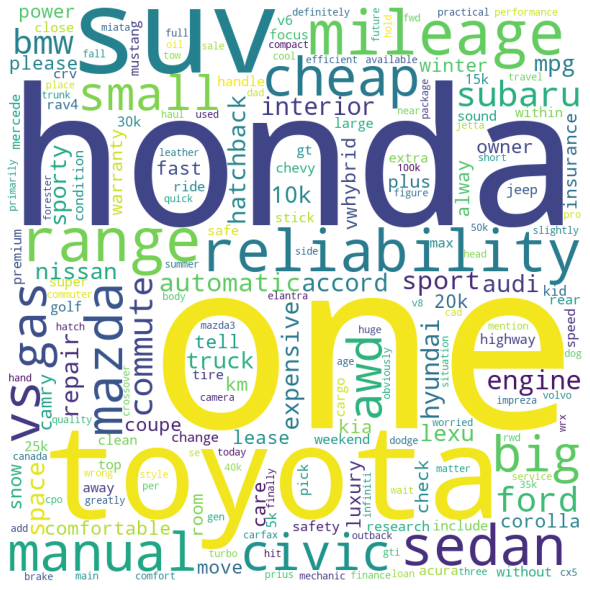

In [ ]:
draw_wordcloud(df)

In [ ]:
df['keywords'][0]

['make',
 '≤9k',
 '50k',
 'less',
 'mechanic',
 'really',
 'personal',
 'see',
 '8',
 'car',
 'ago',
 'similar',
 'think',
 '\n',
 'likely',
 '9k',
 'big',
 '40k',
 'look',
 'recommend',
 'mention',
 'dislike',
 'smart',
 'search',
 'mile',
 'soon',
 'amount',
 'aesthetically',
 'baltimoredc',
 'door',
 'area',
 'hatchback',
 'use',
 'die',
 'automatic',
 'year',
 'fit',
 'drive',
 'since',
 'around',
 'tell',
 'something',
 'honda',
 'preference',
 'stepfather',
 'crazy',
 'aim',
 'start',
 'milesive',
 'ideally',
 'prefer',
 'purchase',
 'seat',
 'subcompact',
 'keep',
 'help',
 'term']

There are 1087 results to your query


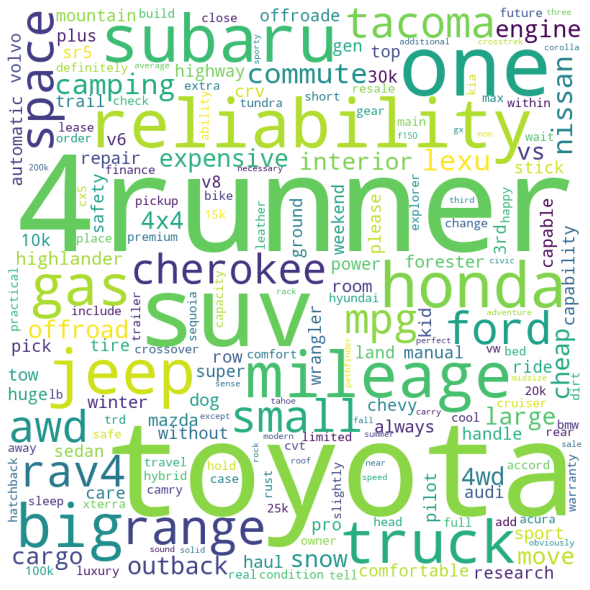

In [ ]:
words_to_query = ['toyota', '4runner'] # change this to your query

# creating new dataframe with the results of your query
query_df = df.copy()
query_df['keywords'] = df['keywords'].apply(lambda x: x if all(item in x for item in words_to_query) else float("nan"))   
query_df = query_df.dropna()

print(f"There are {query_df.shape[0]} results to your query")
draw_wordcloud(query_df)

There are 295 results to your query


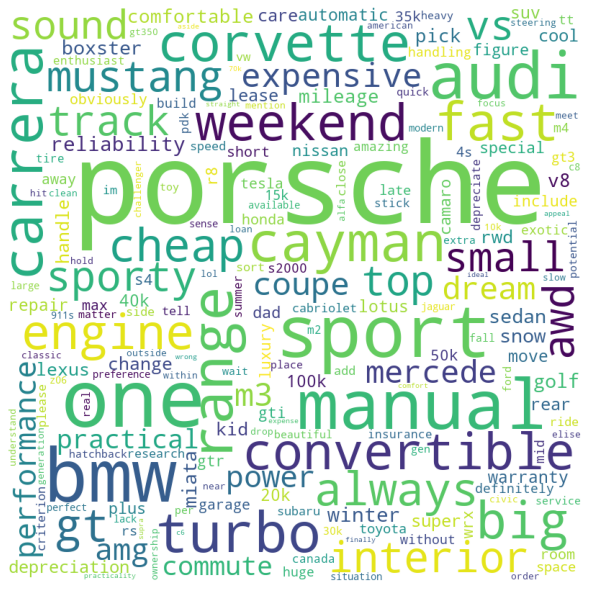

In [ ]:
words_to_query = ['porsche', '911'] # change this to your query

# creating new dataframe with the results of your query
query_df = df.copy()
query_df['keywords'] = df['keywords'].apply(lambda x: x if all(item in x for item in words_to_query) else float("nan"))   
query_df = query_df.dropna()

print(f"There are {query_df.shape[0]} results to your query")
draw_wordcloud(query_df)

There are 854 results to your query


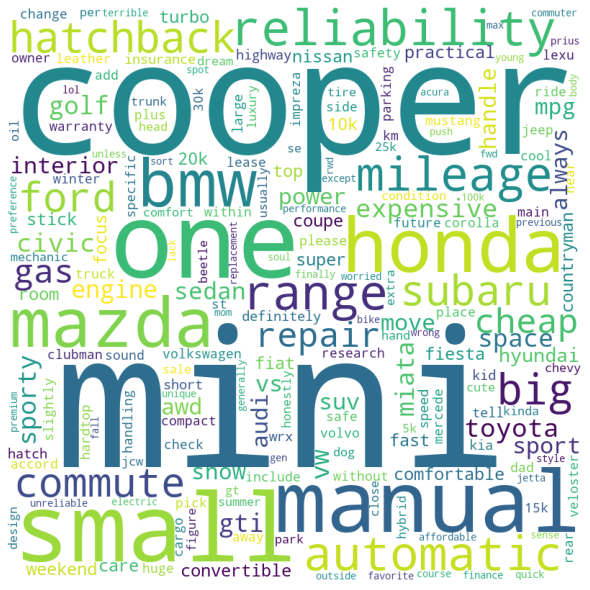

In [ ]:
words_to_query = ['mini', 'cooper'] # change this to your query

# creating new dataframe with the results of your query
query_df = df.copy()
query_df['keywords'] = df['keywords'].apply(lambda x: x if all(item in x for item in words_to_query) else float("nan"))   
query_df = query_df.dropna()

print(f"There are {query_df.shape[0]} results to your query")
draw_wordcloud(query_df)

There are 1180 results to your query


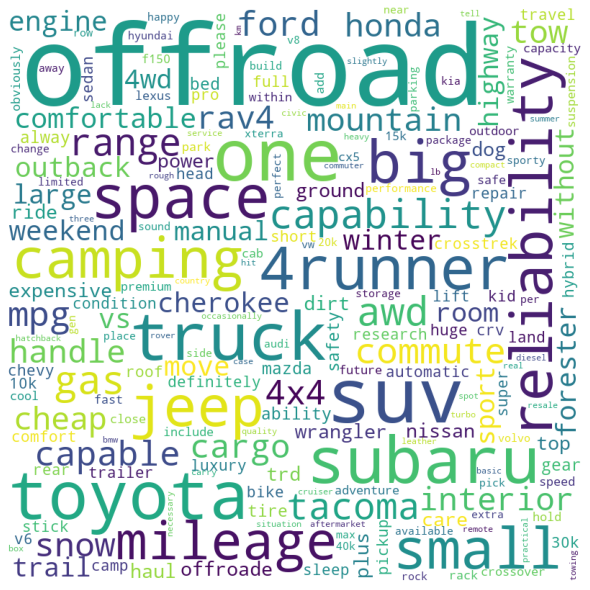

In [ ]:
words_to_query = ['offroad'] # change this to your query

# creating new dataframe with the results of your query
query_df = df.copy()
query_df['keywords'] = df['keywords'].apply(lambda x: x if all(item in x for item in words_to_query) else float("nan"))   
query_df = query_df.dropna()

print(f"There are {query_df.shape[0]} results to your query")
draw_wordcloud(query_df)

There are 10928 results to your query


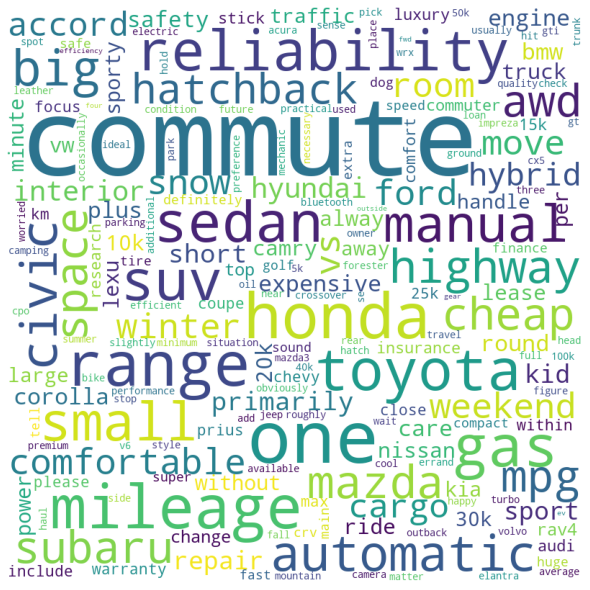

In [ ]:
words_to_query = ['commute'] # change this to your query

# creating new dataframe with the results of your query
query_df = df.copy()
query_df['keywords'] = df['keywords'].apply(lambda x: x if all(item in x for item in words_to_query) else float("nan"))   
query_df = query_df.dropna()

print(f"There are {query_df.shape[0]} results to your query")
draw_wordcloud(query_df)